In [1]:
rm(list = ls())

# install all packages

In [2]:
ipak <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg))
    install.packages(new.pkg, dependencies = TRUE)
  sapply(pkg, require, character.only = TRUE)
}


packages <- c('readr', 'dplyr', 'car', 'Hmisc', 'plm', 'stargazer')


ipak(packages)

Loading required package: readr

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: plm


Attaching package: ‘plm’


The following objects are masked from ‘package:dplyr’:

    between, lag, lead


Loading required package: stargazer


Please cite as: 


 Hlavac, Marek

readr     dplyr       car     Hmisc       plm stargazer 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE

# load packages

In [3]:
library(readr)
library(dplyr)
library(car)
library(Hmisc)
library(plm)
library(stargazer)

# load data

In [4]:
data <- read_csv("CRIME4.csv")

Rows: 630 Columns: 59

── Column specification ──────────────────────────────────────────────────────────────
Delimiter: ","
dbl (59): county, year, crmrte, prbarr, prbconv, prbpris, avgsen, polpc, den...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# check variable names

In [5]:
colnames(data)

[1] "county"   "year"     "crmrte"   "prbarr"   "prbconv"  "prbpris" 
 [7] "avgsen"   "polpc"    "density"  "taxpc"    "west"     "central" 
[13] "urban"    "pctmin80" "wcon"     "wtuc"     "wtrd"     "wfir"    
[19] "wser"     "wmfg"     "wfed"     "wsta"     "wloc"     "mix"     
[25] "pctymle"  "d82"      "d83"      "d84"      "d85"      "d86"     
[31] "d87"      "lcrmrte"  "lprbarr"  "lprbconv" "lprbpris" "lavgsen" 
[37] "lpolpc"   "ldensity" "ltaxpc"   "lwcon"    "lwtuc"    "lwtrd"   
[43] "lwfir"    "lwser"    "lwmfg"    "lwfed"    "lwsta"    "lwloc"   
[49] "lmix"     "lpctymle" "lpctmin"  "clcrmrte" "clprbarr" "clprbcon"
[55] "clprbpri" "clavgsen" "clpolpc"  "cltaxpc"  "clmix"

# drop $year > 1985$

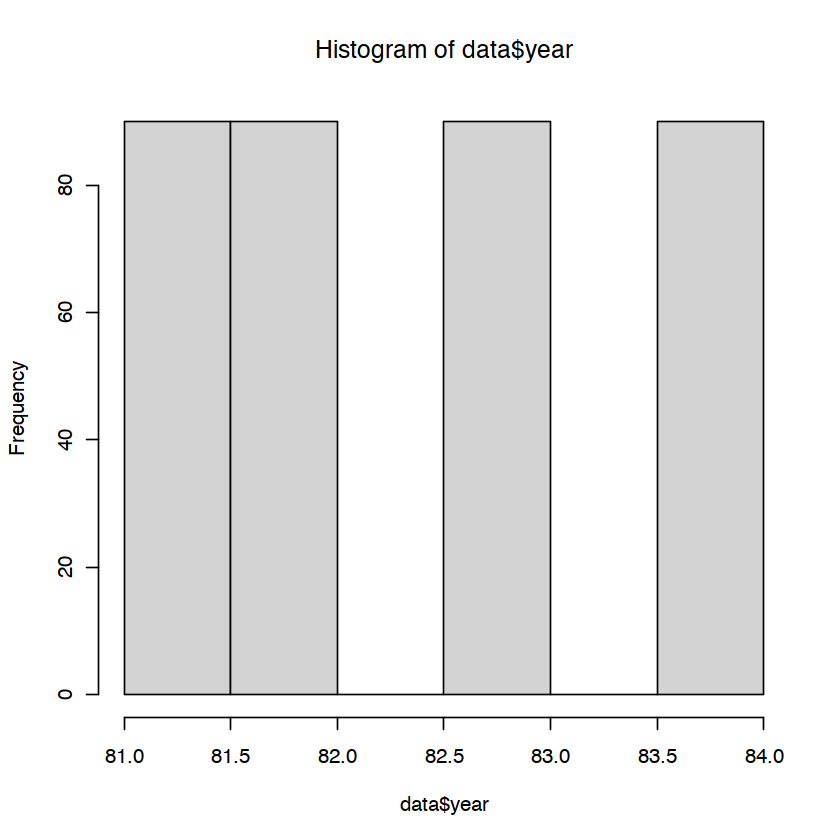

In [6]:
data <- data[data$year <=84,]

hist(data$year)

# drop $year<1984$

Rows: 630 Columns: 59

── Column specification ──────────────────────────────────────────────────────────────
Delimiter: ","
dbl (59): county, year, crmrte, prbarr, prbconv, prbpris, avgsen, polpc, den...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



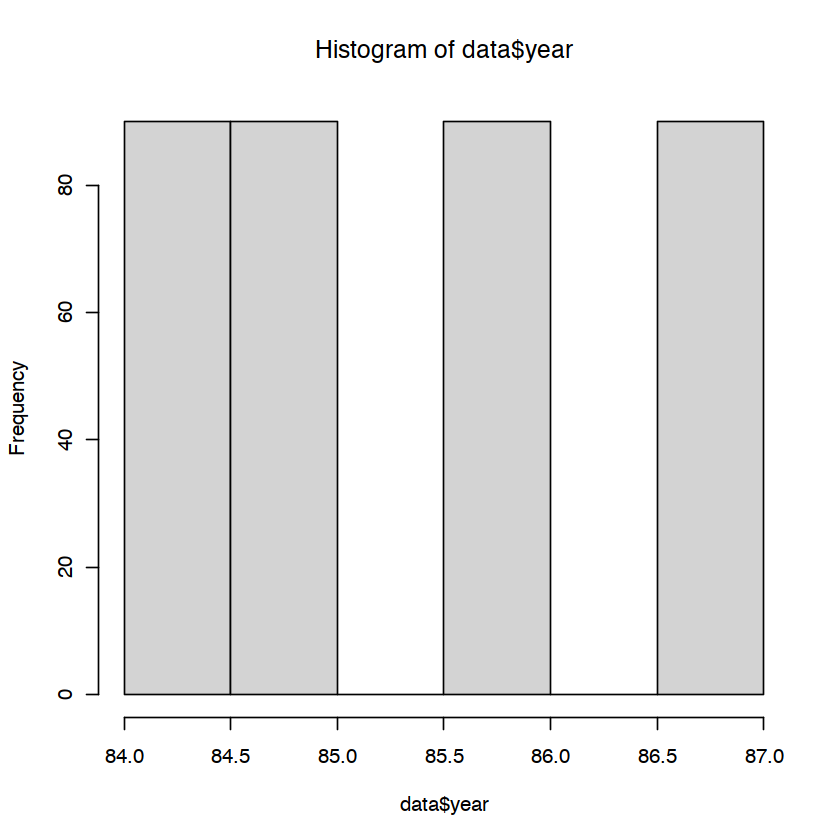

In [7]:
data <- read_csv("CRIME4.csv")

data <- data[data$year >=84,]

hist(data$year)

# (c) POLS

In [8]:
panel <- pdata.frame(data, index=c("county","year"))

In [9]:
POLS = plm(lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + lpolpc + ldensity, data=panel, model="pooling")
summary(POLS)

Pooling Model

Call:
plm(formula = lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + 
    lpolpc + ldensity, data = panel, model = "pooling")

Balanced Panel: n = 90, T = 4, N = 360

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-1.750359 -0.192668 -0.007468  0.218432  1.473721 

Coefficients:
             Estimate Std. Error  t-value  Pr(>|t|)    
(Intercept) -2.310530   0.298850  -7.7314 1.120e-13 ***
lprbarr     -0.533485   0.054792  -9.7365 < 2.2e-16 ***
lprbconv    -0.402804   0.036587 -11.0095 < 2.2e-16 ***
lprbpris     0.037909   0.089723   0.4225    0.6729    
lavgsen     -0.071512   0.073233  -0.9765    0.3295    
lpolpc       0.322680   0.037582   8.5861 2.919e-16 ***
ldensity     0.252356   0.031417   8.0324 1.444e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    123.7
Residual Sum of Squares: 46.012
R-Squared:      0.62804
Adj. R-Squared: 0.62172
F-statistic: 99.3392 on 6 and 353 DF, p-value: < 2.22e-16

In [10]:
summary(POLS, vcovHC)

Pooling Model

Note: Coefficient variance-covariance matrix supplied: vcovHC

Call:
plm(formula = lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + 
    lpolpc + ldensity, data = panel, model = "pooling")

Balanced Panel: n = 90, T = 4, N = 360

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-1.750359 -0.192668 -0.007468  0.218432  1.473721 

Coefficients:
             Estimate Std. Error t-value  Pr(>|t|)    
(Intercept) -2.310530   1.124935 -2.0539 0.0407192 *  
lprbarr     -0.533485   0.148603 -3.5900 0.0003775 ***
lprbconv    -0.402804   0.083325 -4.8341 1.999e-06 ***
lprbpris     0.037909   0.111024  0.3414 0.7329712    
lavgsen     -0.071512   0.100901 -0.7087 0.4789565    
lpolpc       0.322680   0.154493  2.0886 0.0374555 *  
ldensity     0.252356   0.069680  3.6216 0.0003356 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    123.7
Residual Sum of Squares: 46.012
R-Squared:      0.62804
Adj. R-Squared: 0.62172
F-sta

# (c) FD

In [11]:
FD = plm(lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + lpolpc + ldensity, data=panel, model="fd")
summary(FD)

Oneway (individual) effect First-Difference Model

Call:
plm(formula = lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + 
    lpolpc + ldensity, data = panel, model = "fd")

Balanced Panel: n = 90, T = 4, N = 360
Observations used in estimation: 270

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-0.646731 -0.068849  0.010034  0.078681  0.694294 

Coefficients:
             Estimate Std. Error  t-value  Pr(>|t|)    
(Intercept)  0.023643   0.013502   1.7511   0.08109 .  
lprbarr     -0.349571   0.044882  -7.7887 1.567e-13 ***
lprbconv    -0.271996   0.026534 -10.2507 < 2.2e-16 ***
lprbpris    -0.182789   0.040141  -4.5537 8.069e-06 ***
lavgsen     -0.066671   0.035578  -1.8739   0.06205 .  
lpolpc       0.406191   0.037999  10.6896 < 2.2e-16 ***
ldensity     0.508023   0.805962   0.6303   0.52903    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    12.937
Residual Sum of Squares: 7.4967
R-Squared:      0.42051
Adj. R-Squared:

In [12]:
summary(FD, vcovHC)

Oneway (individual) effect First-Difference Model

Note: Coefficient variance-covariance matrix supplied: vcovHC

Call:
plm(formula = lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + 
    lpolpc + ldensity, data = panel, model = "fd")

Balanced Panel: n = 90, T = 4, N = 360
Observations used in estimation: 270

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-0.646731 -0.068849  0.010034  0.078681  0.694294 

Coefficients:
             Estimate Std. Error t-value  Pr(>|t|)    
(Intercept)  0.023643   0.011397  2.0746   0.03900 *  
lprbarr     -0.349571   0.077211 -4.5275 9.054e-06 ***
lprbconv    -0.271996   0.057336 -4.7439 3.442e-06 ***
lprbpris    -0.182789   0.072105 -2.5350   0.01182 *  
lavgsen     -0.066671   0.048405 -1.3774   0.16957    
lpolpc       0.406191   0.101390  4.0062 8.036e-05 ***
ldensity     0.508023   0.675973  0.7515   0.45300    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    12.937
Residual Sum of 

# (c) RE

In [13]:
RE = plm(lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + lpolpc + ldensity, data=panel, model="random")
summary(RE)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + 
    lpolpc + ldensity, data = panel, model = "random")

Balanced Panel: n = 90, T = 4, N = 360

Effects:
                  var std.dev share
idiosyncratic 0.01808 0.13446 0.149
individual    0.10316 0.32119 0.851
theta: 0.7951

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.8948654 -0.0732675  0.0030264  0.0736555  0.5828784 

Coefficients:
             Estimate Std. Error  z-value  Pr(>|z|)    
(Intercept) -1.994206   0.217737  -9.1588 < 2.2e-16 ***
lprbarr     -0.376711   0.042788  -8.8041 < 2.2e-16 ***
lprbconv    -0.296425   0.027202 -10.8971 < 2.2e-16 ***
lprbpris    -0.223284   0.044244  -5.0466 4.497e-07 ***
lavgsen     -0.032446   0.036741  -0.8831    0.3772    
lpolpc       0.378174   0.033274  11.3655 < 2.2e-16 ***
ldensity     0.341234   0.048498   7.0361 1.977e-12 ***
---
Signif. codes:  0 ‘***’ 0.

In [14]:
summary(RE, vcovHC)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Note: Coefficient variance-covariance matrix supplied: vcovHC

Call:
plm(formula = lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + 
    lpolpc + ldensity, data = panel, model = "random")

Balanced Panel: n = 90, T = 4, N = 360

Effects:
                  var std.dev share
idiosyncratic 0.01808 0.13446 0.149
individual    0.10316 0.32119 0.851
theta: 0.7951

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.8948654 -0.0732675  0.0030264  0.0736555  0.5828784 

Coefficients:
             Estimate Std. Error z-value  Pr(>|z|)    
(Intercept) -1.994206   0.622937 -3.2013  0.001368 ** 
lprbarr     -0.376711   0.070812 -5.3199 1.038e-07 ***
lprbconv    -0.296425   0.054721 -5.4171 6.058e-08 ***
lprbpris    -0.223284   0.077051 -2.8979  0.003757 ** 
lavgsen     -0.032446   0.058186 -0.5576  0.577102    
lpolpc       0.378174   0.092421  4.0919 4.279e-05 ***
ldensity     0.341234   0.0657

# (c) FE

In [15]:
FE = plm(lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + lpolpc + ldensity, data=panel, model="within")
summary(FE)

Oneway (individual) effect Within Model

Call:
plm(formula = lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + 
    lpolpc + ldensity, data = panel, model = "within")

Balanced Panel: n = 90, T = 4, N = 360

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.6001390 -0.0570728 -0.0022374  0.0571892  0.5149102 

Coefficients:
          Estimate Std. Error t-value  Pr(>|t|)    
lprbarr  -0.328842   0.045534 -7.2220 5.480e-12 ***
lprbconv -0.270246   0.028739 -9.4033 < 2.2e-16 ***
lprbpris -0.198473   0.045232 -4.3879 1.656e-05 ***
lavgsen  -0.051996   0.037253 -1.3957 0.1639674    
lpolpc    0.390932   0.035826 10.9119 < 2.2e-16 ***
ldensity  1.578019   0.436562  3.6146 0.0003601 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    8.1243
Residual Sum of Squares: 4.773
R-Squared:      0.4125
Adj. R-Squared: 0.20109
F-statistic: 30.8941 on 6 and 264 DF, p-value: < 2.22e-16

In [16]:
summary(FE, vcovHC)

Oneway (individual) effect Within Model

Note: Coefficient variance-covariance matrix supplied: vcovHC

Call:
plm(formula = lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + 
    lpolpc + ldensity, data = panel, model = "within")

Balanced Panel: n = 90, T = 4, N = 360

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.6001390 -0.0570728 -0.0022374  0.0571892  0.5149102 

Coefficients:
          Estimate Std. Error t-value  Pr(>|t|)    
lprbarr  -0.328842   0.067144 -4.8975 1.693e-06 ***
lprbconv -0.270246   0.058797 -4.5963 6.673e-06 ***
lprbpris -0.198473   0.080121 -2.4772   0.01387 *  
lavgsen  -0.051996   0.061397 -0.8469   0.39783    
lpolpc    0.390932   0.083053  4.7070 4.063e-06 ***
ldensity  1.578019   0.332375  4.7477 3.377e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    8.1243
Residual Sum of Squares: 4.773
R-Squared:      0.4125
Adj. R-Squared: 0.20109
F-statistic: 13.6989 on 6 and 89 DF, p-value: 5

# (c) comparison table

In [17]:
stargazer(POLS, FD, FE, RE,
          title="Panel regressions",
          header=FALSE, 
          type="text",  
          omit.table.layout="n",
          digits=3, 
          intercept.bottom=TRUE, 
          dep.var.labels.include = FALSE,
          model.numbers = FALSE,
          dep.var.caption="Dependent variable: lcrmrte",
          model.names=FALSE,
          omit.stat=c("LL","ser"),
          column.labels=c("Pooled OLS", "FD", "FE", "RE"))


Panel regressions
                                        Dependent variable: lcrmrte                            
             ----------------------------------------------------------------------------------
                   Pooled OLS                  FD                      FE                RE    
-----------------------------------------------------------------------------------------------
lprbarr             -0.533***               -0.350***               -0.329***        -0.377*** 
                     (0.055)                 (0.045)                 (0.046)          (0.043)  
                                                                                               
lprbconv            -0.403***               -0.272***               -0.270***        -0.296*** 
                     (0.037)                 (0.027)                 (0.029)          (0.027)  
                                                                                               
lprbpris             

# (d) test FE vs RE

In [18]:
phtest(FE, RE)


	Hausman Test

data:  lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + lpolpc +  ...
chisq = 19.366, df = 6, p-value = 0.003589
alternative hypothesis: one model is inconsistent


# (f) IV regression for FD (aka why linear modelling typically sucks in real life)

## * R-squared is invalid (aka not computable), meaning this model has no prediction power
## * none variable is significant 

In [19]:
FD2SLS <- plm(lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + lpolpc + ldensity
                  | lprbarr + lprbconv + lprbpris + lavgsen + ldensity + ltaxpc,
                  data = panel, model = "fd")

In [22]:
summary(FD2SLS)

Oneway (individual) effect First-Difference Model
Instrumental variable estimation
   (Balestra-Varadharajan-Krishnakumar's transformation)

Call:
plm(formula = lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + 
    lpolpc + ldensity | lprbarr + lprbconv + lprbpris + lavgsen + 
    ldensity + ltaxpc, data = panel, model = "fd")

Balanced Panel: n = 90, T = 4, N = 360
Observations used in estimation: 270

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-3.084332 -0.090585  0.018256  0.115986  0.817915 

Coefficients:
              Estimate Std. Error z-value Pr(>|z|)
(Intercept)  0.0719137  0.0940081  0.7650   0.4443
lprbarr     -0.2189772  0.2590977 -0.8452   0.3980
lprbconv     0.0070008  0.5252311  0.0133   0.9894
lprbpris    -0.1359316  0.1162045 -1.1698   0.2421
lavgsen     -0.2174861  0.2905548 -0.7485   0.4541
lpolpc      -0.5866111  1.8618192 -0.3151   0.7527
ldensity    -2.2264981  5.3472941 -0.4164   0.6771

Total Sum of Squares:    12.937
Residual Sum of Squar

In [23]:
summary(FD2SLS, vcovHC)

Oneway (individual) effect First-Difference Model
Instrumental variable estimation
   (Balestra-Varadharajan-Krishnakumar's transformation)

Note: Coefficient variance-covariance matrix supplied: vcovHC

Call:
plm(formula = lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + 
    lpolpc + ldensity | lprbarr + lprbconv + lprbpris + lavgsen + 
    ldensity + ltaxpc, data = panel, model = "fd")

Balanced Panel: n = 90, T = 4, N = 360
Observations used in estimation: 270

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-3.084332 -0.090585  0.018256  0.115986  0.817915 

Coefficients:
              Estimate Std. Error z-value Pr(>|z|)
(Intercept)  0.0719137  0.0833140  0.8632   0.3880
lprbarr     -0.2189772  0.2402696 -0.9114   0.3621
lprbconv     0.0070008  0.4678417  0.0150   0.9881
lprbpris    -0.1359316  0.1131212 -1.2016   0.2295
lavgsen     -0.2174861  0.3136690 -0.6934   0.4881
lpolpc      -0.5866111  1.5544645 -0.3774   0.7059
ldensity    -2.2264981  5.6205085 -0.3961 

# compare IV model with FD

In [24]:
stargazer(POLS, FD, FD2SLS, FE, RE,
          title="Panel regressions",
          header=FALSE, 
          type="text",  
          omit.table.layout="n",
          digits=3, 
          intercept.bottom=TRUE, 
          dep.var.labels.include = FALSE,
          model.numbers = FALSE,
          dep.var.caption="Dependent variable: lcrmrte",
          model.names=FALSE,
          omit.stat=c("LL","ser"),
          column.labels=c("Pooled OLS", "FD", "FD2SLS", "FE", "RE"))


Panel regressions
                                             Dependent variable: lcrmrte                                 
             --------------------------------------------------------------------------------------------
                   Pooled OLS                  FD             FD2SLS             FE                RE    
---------------------------------------------------------------------------------------------------------
lprbarr             -0.533***               -0.350***         -0.219          -0.329***        -0.377*** 
                     (0.055)                 (0.045)          (0.259)          (0.046)          (0.043)  
                                                                                                         
lprbconv            -0.403***               -0.272***          0.007          -0.270***        -0.296*** 
                     (0.037)                 (0.027)          (0.525)          (0.029)          (0.027)  
                           

# Hausman test for endogeneity

In [25]:
phtest(FD, FD2SLS)


	Hausman Test

data:  lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + lpolpc +  ...
chisq = 0.28447, df = 6, p-value = 0.9996
alternative hypothesis: one model is inconsistent


# (g) first stage of 2SLS

In [26]:
FS = plm(lpolpc ~ lprbarr + lprbconv + lprbpris + lavgsen + ltaxpc + ldensity, data=panel, model="fd")
summary(FS) 

Oneway (individual) effect First-Difference Model

Call:
plm(formula = lpolpc ~ lprbarr + lprbconv + lprbpris + lavgsen + 
    ltaxpc + ldensity, data = panel, model = "fd")

Balanced Panel: n = 90, T = 4, N = 360
Observations used in estimation: 270

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-2.4561963 -0.0679614  0.0068052  0.0937199  0.9814232 

Coefficients:
             Estimate Std. Error t-value  Pr(>|t|)    
(Intercept)  0.054450   0.023590  2.3082  0.021765 *  
lprbarr      0.134998   0.072534  1.8612  0.063836 .  
lprbconv     0.282493   0.039459  7.1592 8.109e-12 ***
lprbpris     0.048357   0.065052  0.7434  0.457924    
lavgsen     -0.154319   0.057056 -2.7047  0.007283 ** 
ltaxpc      -0.060497   0.096321 -0.6281  0.530494    
ldensity    -2.775158   1.296259 -2.1409  0.033202 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    25.208
Residual Sum of Squares: 19.712
R-Squared:      0.21803
Adj. R-Squared